In [1]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("/home/dom/Documents/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 0
    j = 1
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==0 and j==1:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)

In [2]:
import sklearn
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt


accuracy = []

for i in range(10000):
    xData = tData[i][0]
    yData = tData[i][1]
    nData = np.vstack((xData, yData)).T
    
    clf = DecisionTreeClassifier(random_state=1)
    clf.fit(nData, classification)

    score = clf.score(nData, classification)
    accuracy.append(score)


x = list(range(0, len(accuracy)))

In [3]:
print(accuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [4]:
xData = tData[0][0]
yData = tData[0][1]
nData = np.vstack((xData, yData)).T

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

test_acc = []
total_acc = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(nData,
                                                        classification,
                                                        test_size=0.20)  

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)  

    #print(confusion_matrix(y_test, y_pred))  
    #print(classification_report(y_test, y_pred))


    conf_mat = confusion_matrix(y_test, y_pred)
    total_sum = np.sum(conf_mat)
    trace_sum = np.trace(conf_mat)
    test_set_acc = trace_sum / total_sum
    test_acc.append(test_set_acc)
    

    score = clf.score(nData, classification)
    total_acc.append(score)
    

    #print(score)
    #print(test_set_acc)

    #sklearn.tree.export_graphviz(clf, out_file="/home/dom/Documents/MPhys/TheGrandTour/DecTree.dot")


In [ ]:
plt.hist(test_acc, bins=20)
plt.title("Histogram of randomised test data decision tree accuracy at same timestep")
plt.savefig("DecTree_testdata_acc.png", dpi=300)
plt.show()


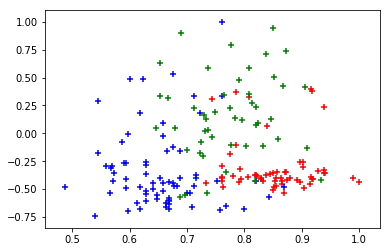

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(xData, yData, color=data_colour, marker="+")
plt.show()

In [ ]:
np.shape(nData)

(178, 2)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  


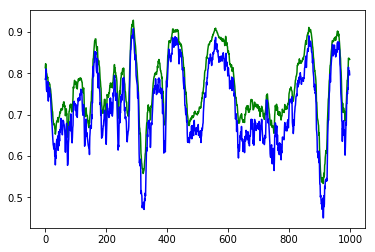

depth: 2
0.9083333333333333
0.9287078651685396


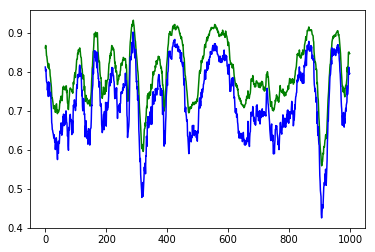

depth: 3
0.9016666666666667
0.9320224719101126


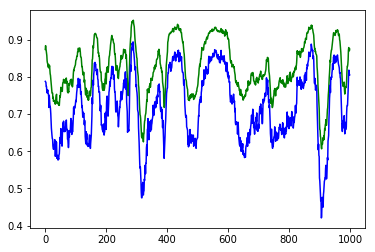

depth: 4
0.8947222222222222
0.9529213483146068


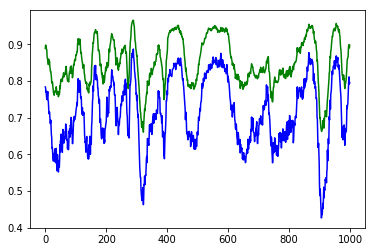

depth: 5
0.8872222222222221
0.9657865168539327


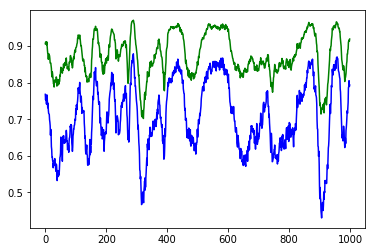

depth: 6
0.8783333333333332
0.9700000000000002


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

for depth in range(2, 7):
    test_accuracy = []
    total_accuracy = []
    for t in range(1000):
        xData = tData[t][0]
        yData = tData[t][1]
        nData = np.vstack((xData, yData)).T

        test_acc = []
        total_acc = []

        for i in range(100):
            X_train, X_test, y_train, y_test = train_test_split(nData,
                                                                classification,
                                                                test_size=0.20)  
            clf = DecisionTreeClassifier(max_depth=depth)
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)  

            conf_mat = confusion_matrix(y_test, y_pred)
            total_sum = np.sum(conf_mat)
            trace_sum = np.trace(conf_mat)
            test_set_acc = trace_sum / total_sum
            test_acc.append(test_set_acc)

            score = clf.score(nData, classification)
            total_acc.append(score)

        test_accuracy.append(np.mean(test_acc))
        total_accuracy.append(np.mean(total_acc))

    x = list(range(1000))
    plt.plot(x, total_accuracy, '-', marker=" ", color="g")
    plt.plot(x, test_accuracy, '-', marker=" ", color="b")
    plt.show()
    
    print("depth: " + str(depth))
    print(np.max(test_accuracy))
    print(np.max(total_accuracy))

0.9008333333333333
0.932808988764045


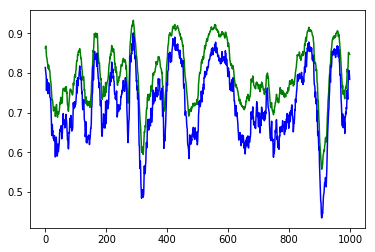

In [19]:
x = list(range(1000))
plt.plot(x, total_accuracy, '-', marker=" ", color="g")
plt.plot(x, test_accuracy, '-', marker=" ", color="b")

print(np.max(test_accuracy))
print(np.max(total_accuracy))

2
0.7860555555555554
-----------
3
0.8089166666666667
-----------
4
0.7978611111111112
-----------
5
0.7864722222222221
-----------
6
0.7641388888888889
-----------
7
0.7491666666666668
-----------
8
0.7453333333333334
-----------
9
0.7376111111111112
-----------
10
0.7256944444444444
-----------
11
0.7266944444444444
-----------
12
0.732638888888889
-----------
13
0.7314444444444446
-----------
14
0.7319166666666667
-----------
[0.7860555555555554, 0.8089166666666667, 0.7978611111111112, 0.7864722222222221, 0.7641388888888889, 0.7491666666666668, 0.7453333333333334, 0.7376111111111112, 0.7256944444444444, 0.7266944444444444, 0.732638888888889, 0.7314444444444446, 0.7319166666666667]


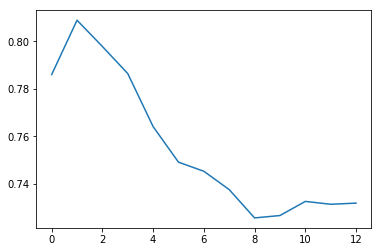

In [17]:
# compare limiting decision tree number of levels

xData = tData[0][0]
yData = tData[0][1]
nData = np.vstack((xData, yData)).T

test_accuracy = []
total_accuracy = []

for j in range(2, 15):
    test_acc = []
    total_acc = []
    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(nData,
                                                            classification,
                                                            test_size=0.20)  

        clf = DecisionTreeClassifier(max_depth=j)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)  

        conf_mat = confusion_matrix(y_test, y_pred)
        total_sum = np.sum(conf_mat)
        trace_sum = np.trace(conf_mat)
        test_set_acc = trace_sum / total_sum
        test_acc.append(test_set_acc)

        score = clf.score(nData, classification)
        total_acc.append(score)

    test_accuracy.append(np.mean(test_acc))
    print(j)
    print(np.mean(test_acc))
    print("-----------")

print(test_accuracy)

plt.plot(test_accuracy)

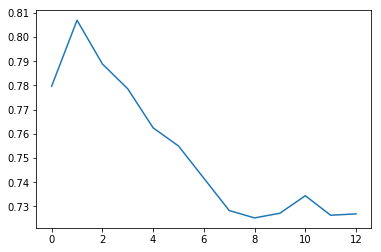

timestep: 63


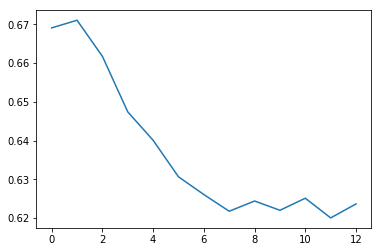

timestep: 851


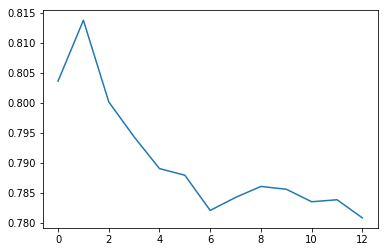

timestep: 486


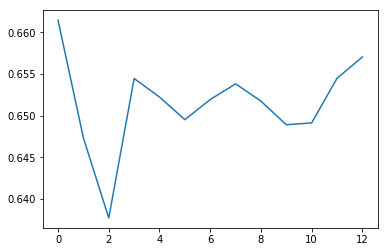

timestep: 884


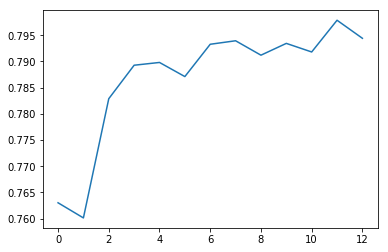

timestep: 659


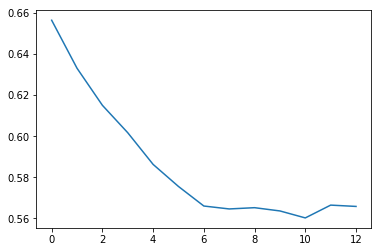

timestep: 889


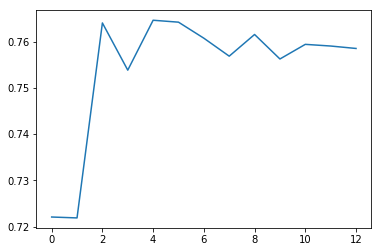

timestep: 449


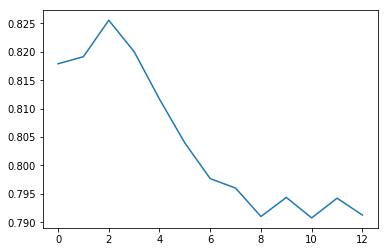

timestep: 513


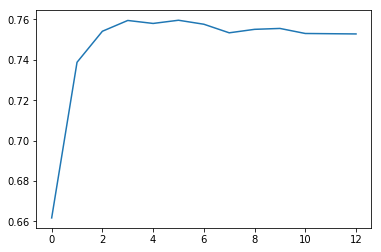

timestep: 177


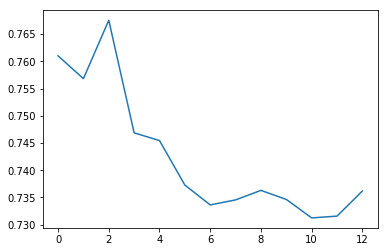

timestep: 771


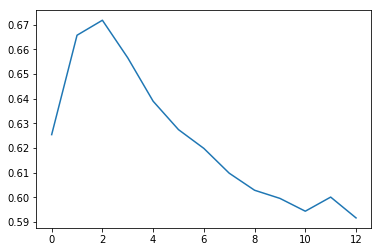

timestep: 890


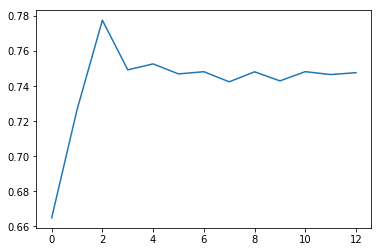

timestep: 300


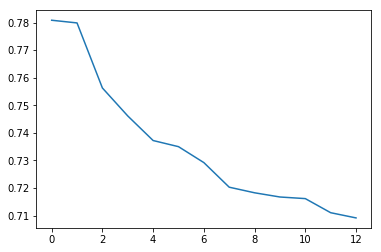

timestep: 941


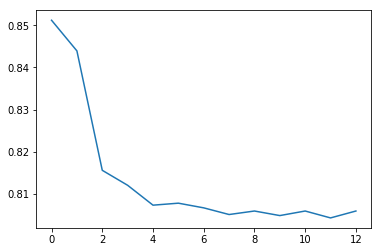

timestep: 997


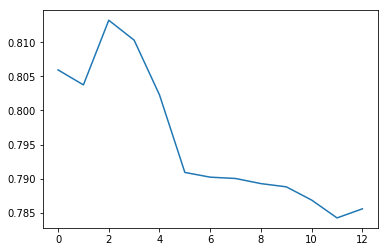

timestep: 349


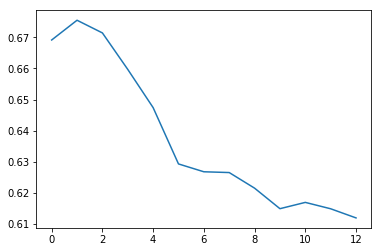

timestep: 41


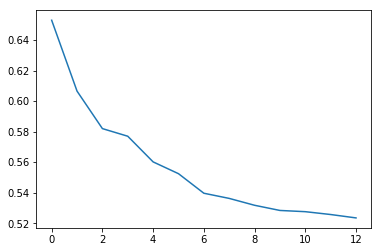

timestep: 315


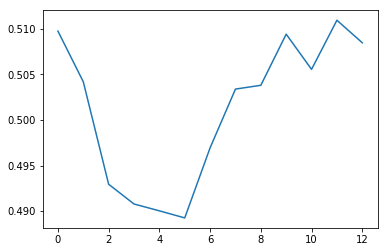

timestep: 629


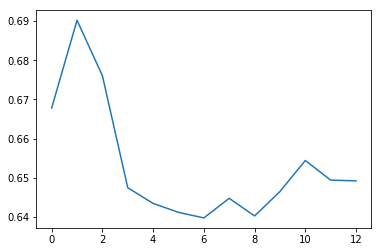

timestep: 478


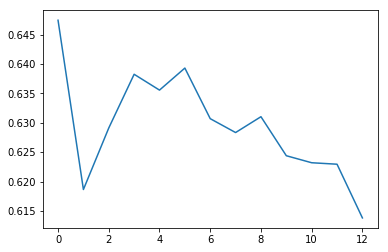

timestep: 144


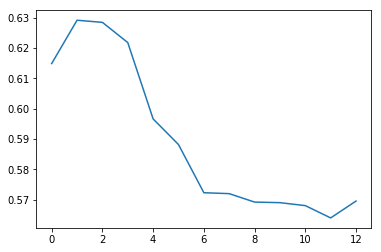

timestep: 296


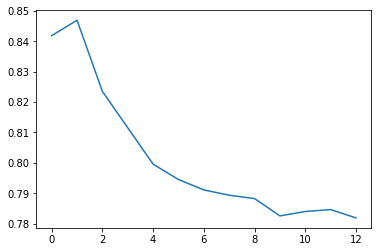

timestep: 501


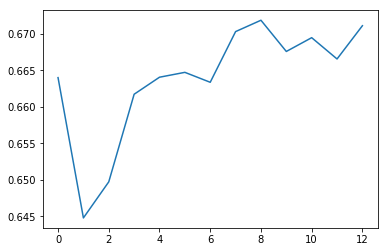

timestep: 874


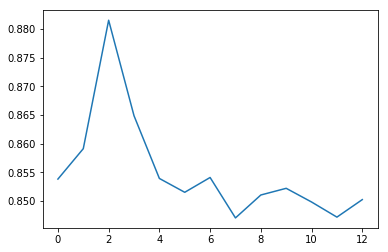

timestep: 582


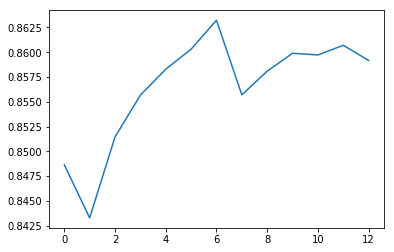

timestep: 199


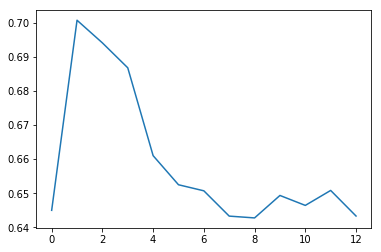

timestep: 123


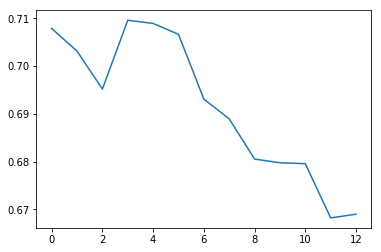

timestep: 10


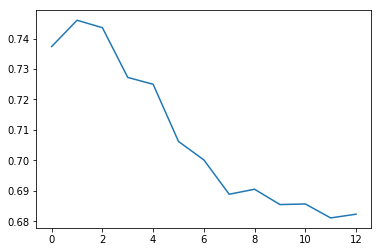

timestep: 927


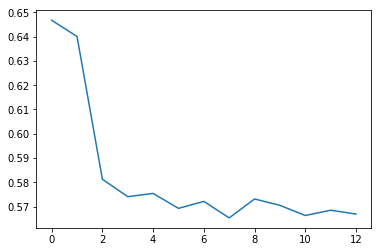

timestep: 589


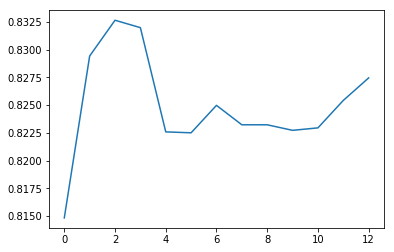

timestep: 837


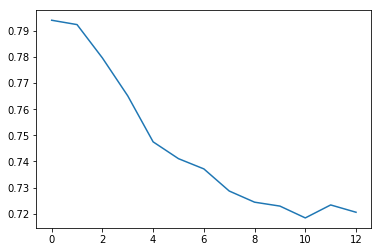

In [24]:
import random
timestep = random.sample(range(0, 999), 30)

best_depth_list = []

for t in timestep:
    
    xData = tData[t][0]
    yData = tData[t][1]
    nData = np.vstack((xData, yData)).T

    test_accuracy = []
    total_accuracy = []
    
    best_depth = 0
    best_depth_score = 0

    for j in range(2, 15):
        test_acc = []
        total_acc = []
        for i in range(1000):
            X_train, X_test, y_train, y_test = train_test_split(nData,
                                                                classification,
                                                                test_size=0.20)  

            clf = DecisionTreeClassifier(max_depth=j)
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)  

            conf_mat = confusion_matrix(y_test, y_pred)
            total_sum = np.sum(conf_mat)
            trace_sum = np.trace(conf_mat)
            test_set_acc = trace_sum / total_sum
            test_acc.append(test_set_acc)

            score = clf.score(nData, classification)
            total_acc.append(score)
            
        if best_depth_score < np.mean(test_acc):
            best_depth = j
            
        test_accuracy.append(np.mean(test_acc))
    print("timestep: " + str(t))    
    plt.plot(test_accuracy)
    plt.show()
    
    best_depth_list.append(best_depth)


In [21]:
best_depth_list

[14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14]